## AIM 5001 Project 4 - Scikit Learning


In [222]:
#import pandas
import pandas as pd

In [223]:
#read mushroom data into datafame
df = pd.read_csv("https://raw.githubusercontent.com/MarlaGoodman/AIM-5001/master/agaricus-lepiota%20(1).data", header = None)

## Part 1: Data Acquisition, Data Preparation & Exploratory Data Analysis

### Get Data Cleaned Up 

In [224]:
#show df
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [225]:
#get subset of data (per project instructions)
sub_df= df.iloc[:, [0, 5, 18, 22]]
sub_df

,0,5,18,22
0,p,p,o,u
1,e,a,o,g
2,e,l,o,m
3,p,p,o,u
4,e,n,o,g
...,...,...,...,...
8119,e,n,o,l
8120,e,n,o,l
8121,e,n,o,l
8122,p,y,o,l


In [226]:
#name columns
sub_df.columns=['Poisonous','Odor','Ring_Amt','Habitat']
sub_df

,Poisonous,Odor,Ring_Amt,Habitat
0,p,p,o,u
1,e,a,o,g
2,e,l,o,m
3,p,p,o,u
4,e,n,o,g
...,...,...,...,...
8119,e,n,o,l
8120,e,n,o,l
8121,e,n,o,l
8122,p,y,o,l


I prefer words to letters, so I am replacing the letters in the subset dataframe with  their appropriate words from the data dictionary. 

In [227]:
#replacing letters of columns with their appropriate word from the data dictionary
sub_df.Poisonous.replace('e', 'edible', inplace = True)
sub_df.Poisonous.replace('p', 'poisonous', inplace = True)
sub_df.Odor.replace('a', 'almond', inplace = True)
sub_df.Odor.replace('l', 'anise', inplace = True)
sub_df.Odor.replace('c', 'creosote', inplace = True)
sub_df.Odor.replace('y', 'fishy', inplace = True)
sub_df.Odor.replace('f','foul',inplace=True)
sub_df.Odor.replace('m','musty',inplace=True)
sub_df.Odor.replace('n','none',inplace=True)
sub_df.Odor.replace('p','pungent',inplace=True)
sub_df.Odor.replace('s','spicy',inplace=True)
sub_df.Ring_Amt.replace('n','none',inplace=True)
sub_df.Ring_Amt.replace('o','one',inplace=True)
sub_df.Ring_Amt.replace('t','two',inplace=True)
sub_df.Habitat.replace('g', 'grasses', inplace = True)
sub_df.Habitat.replace('l', 'leaves', inplace = True)
sub_df.Habitat.replace('m', 'meadows', inplace = True)
sub_df.Habitat.replace('p', 'paths', inplace = True)
sub_df.Habitat.replace('u','urban',inplace=True)
sub_df.Habitat.replace('w','waste',inplace=True)
sub_df.Habitat.replace('d','woods',inplace=True)
sub_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Poisonous,Odor,Ring_Amt,Habitat
0,poisonous,pungent,one,urban
1,edible,almond,one,grasses
2,edible,anise,one,meadows
3,poisonous,pungent,one,urban
4,edible,none,one,grasses
...,...,...,...,...
8119,edible,none,one,leaves
8120,edible,none,one,leaves
8121,edible,none,one,leaves
8122,poisonous,fishy,one,leaves


### Quick EDA On All The Columns:

1. Poisonous column distribution and graph

In [228]:
#count distinct values within poisonous column
sub_df['Poisonous'].value_counts()

edible       4208
poisonous    3916
Name: Poisonous, dtype: int64

In [229]:
#import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


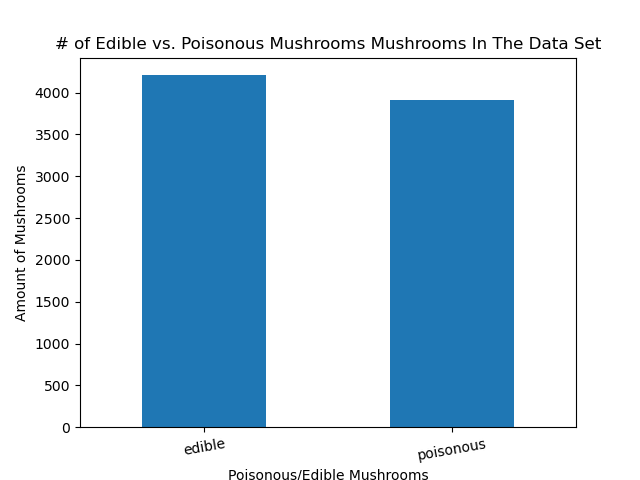

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

In [230]:
#creating a space for the graph
fig=plt.figure(1)
#counting the frequecies
count=(sub_df['Poisonous'].value_counts())
#plot in a bar chart
#give it a title
count.plot.bar(title='# of Edible vs. Poisonous Mushrooms Mushrooms In The Data Set')
plt.xlabel("Poisonous/Edible Mushrooms")
plt.ylabel("Amount of Mushrooms")
plt.xticks(rotation=10, horizontalalignment="center")



A little more of the half the use cases are edible. A little less than half the uses cases are poisonous.

2. Odor column and graph

In [231]:
#count distinct values within column
sub_df['Odor'].value_counts()

none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: Odor, dtype: int64

<IPython.core.display.Javascript object>


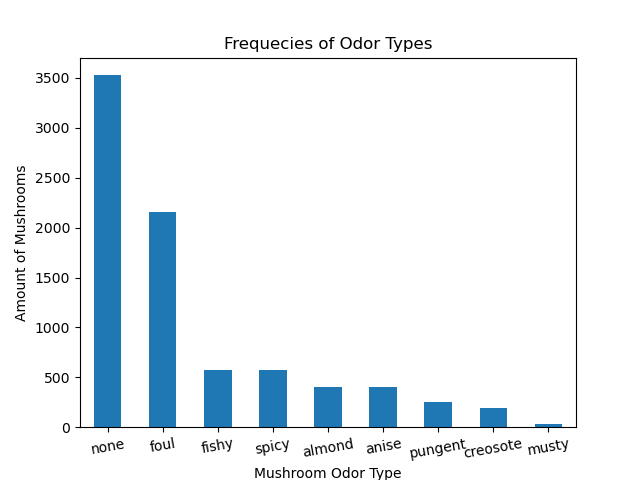

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

In [232]:
#creating a space for the graph
fig=plt.figure(2)
#counting the frequecies
count=(sub_df['Odor'].value_counts())
#plot in a bar chart
#give it a title
count.plot.bar(title='Frequecies of Odor Types')
plt.xlabel("Mushroom Odor Type")
plt.ylabel("Amount of Mushrooms")
plt.xticks(rotation=10, horizontalalignment="center")

There are more mushrooms with no smell than any other category. The least amount of mushrooms have a musty odor. Anise and almond odors have the same amount of mushrooms at 400.  

3. Ring Amount column and graph

In [233]:
#count distinct values within column
sub_df['Ring_Amt'].value_counts()

one     7488
two      600
none      36
Name: Ring_Amt, dtype: int64

<IPython.core.display.Javascript object>


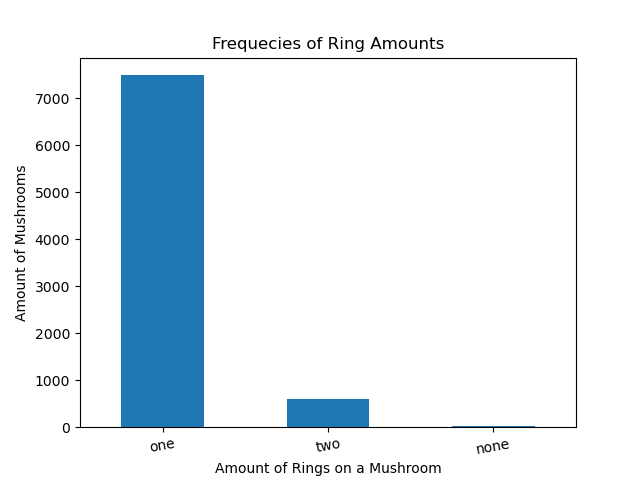

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

In [234]:
#creating a space for the graph
fig=plt.figure(3)
#counting the frequecies
count=(sub_df['Ring_Amt'].value_counts())
#plot in a bar chart
#give it a title
count.plot.bar(title='Frequecies of Ring Amounts')
plt.xlabel("Amount of Rings on a Mushroom")
plt.ylabel("Amount of Mushrooms")
plt.xticks(rotation=10, horizontalalignment="center")

Most mushrooms have just one ring.

4. Habitat column and graph

In [235]:
#count distinct values within column
sub_df['Habitat'].value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: Habitat, dtype: int64

<IPython.core.display.Javascript object>


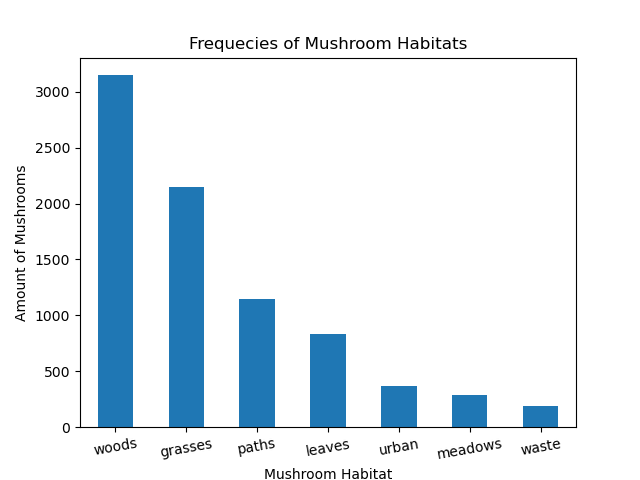

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

In [236]:
#creating a space for the graph
fig=plt.figure(4)
#counting the frequecies
count=(sub_df['Habitat'].value_counts())
#plot in a bar chart
#give it a title
count.plot.bar(title='Frequecies of Mushroom Habitats')
plt.xlabel("Mushroom Habitat")
plt.ylabel("Amount of Mushrooms")
plt.xticks(rotation=10, horizontalalignment="center")

The most frequent habitat is the woods, followed by grasses, paths, leaves, and so on.

### Dummy Variables 

For each column other than 'Poisonous', I am creating a set of dummy variables. This will be used for the next section of part 1, and also for the scikit-learn part of the project. 

In [237]:
#use pd.get_dummies function
ddf= pd.get_dummies(sub_df, columns=['Odor','Ring_Amt','Habitat'])
#change poisonous column to binary - 0 for edible, 1 for poisonous
ddf.Poisonous.replace('edible', 0, inplace=True)
ddf.Poisonous.replace('poisonous', 1, inplace=True)
ddf.head()

,Poisonous,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Ring_Amt_none,Ring_Amt_one,Ring_Amt_two,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


### Some More EDA Using Dummy Variables

I will do some more EDA, this time with plots that compare different variables to each other. Specifically, I want to compare variables to the poisonous/edible column. To do that, I am grouping the data by the poisonous/edible column.

In [238]:
#group dummy variable df by 'Poisonous' column data; aggregation of sum
grouping = ddf.groupby(['Poisonous']).sum()
grouping

,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Ring_Amt_none,Ring_Amt_one,Ring_Amt_two,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
Poisonous,,,,,,,,,,,,,,,,,,,
0,400.0,400.0,0.0,0.0,0.0,0.0,3408.0,0.0,0.0,0.0,3680.0,528.0,1408.0,240.0,256.0,136.0,96.0,192.0,1880.0
1,0.0,0.0,192.0,576.0,2160.0,36.0,120.0,256.0,576.0,36.0,3808.0,72.0,740.0,592.0,36.0,1008.0,272.0,0.0,1268.0


I am creating three different sets for the three different variables, and putting the sub_variables (dummies columns) into that set. Then I am graphing the new sets. The x axis will contain 0 and 1, 0 for edible and 1 for poisonous

In [239]:
#create 3 different sets from the grouped data
#extracting appropriate columns from the grouped data
odor=grouping.iloc[:, 0:9]
ring_amt=grouping.iloc[:,9:12]
habitat=grouping.iloc[:,12:]

<IPython.core.display.Javascript object>


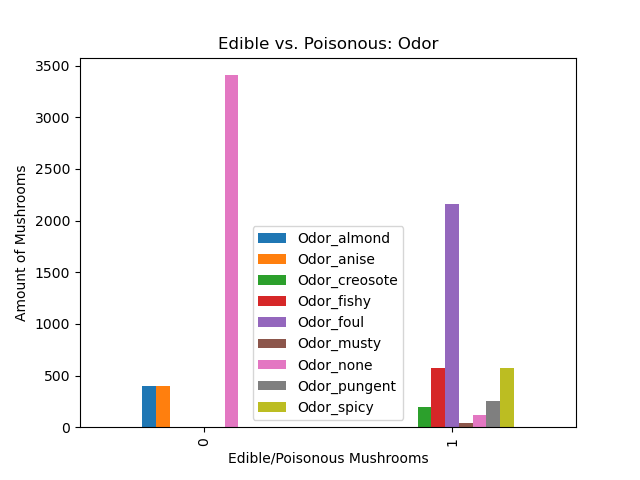

Text(0, 0.5, 'Amount of Mushrooms')

In [240]:
#plot odor grouped data
odor.plot.bar(title='Edible vs. Poisonous: Odor')
plt.xlabel("Edible/Poisonous Mushrooms")
plt.ylabel("Amount of Mushrooms")


Most edible mushrooms have no odor. 
Edible mushrooms can also have an anise (licorice-like) or almond smell.
Most poisonous mushrooms have a foul odor.
Posionous mushrooms can also have a spicy, pungent, musty, fishy, or creosote (smoky, tar/asphalt-like).
This makes sense - as humans we have a natural instinct of what to eat vs. not eat by way of smelling.
If a food smells foul, too spicy, pungent, musty, too fishy, or too smoky, we won't eat it because we assume it probably spoiled and would give us food poisoning. 
On the other hand, people eat almond and locirice foods all the time, because the smell does not indicate that the food is going to poison us. Smell may be an excellent predictor for poisonous mushrooms in the predictive model in part 2.

<IPython.core.display.Javascript object>


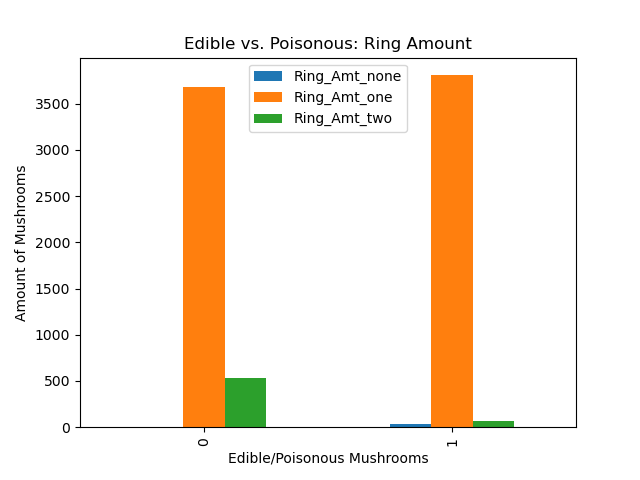

Text(0, 0.5, 'Amount of Mushrooms')

In [241]:
#plot ring amount grouped data
ring_amt.plot.bar(title='Edible vs. Poisonous: Ring Amount')
plt.xlabel("Edible/Poisonous Mushrooms")
plt.ylabel("Amount of Mushrooms")


Edible mushrooms with one ring and poisonous mushrooms with one ring appear almost the same amount of times. There are more edible mushrooms with two rings than there are two ringed poisonous mushrooms. Only poisonous mushrooms have no rings. Ring amount does not seem to be the best indicator of whether a mushroom is poisonous or not. We will have to see when we do the predictive model. 

<IPython.core.display.Javascript object>


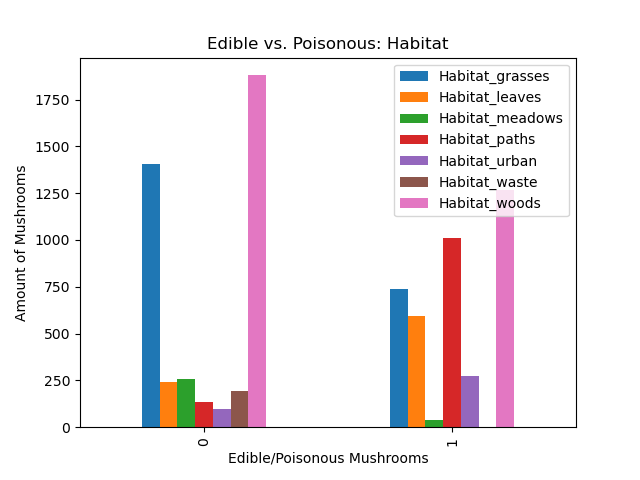

Text(0, 0.5, 'Amount of Mushrooms')

In [242]:
#plot habitat grouped data
habitat.plot.bar(title='Edible vs. Poisonous: Habitat')
plt.xlabel("Edible/Poisonous Mushrooms")
plt.ylabel("Amount of Mushrooms")


More edible mushrooms live in woods and grasses. Still, a substantial amount of poisonous mushrooms also live in those habitats. For the habitats of paths, leaves, and urban: more poisonous mushrooms seems to live in those places compared to edible ones. Only edible mushrooms in the data appear in the waste habitat. Habitat may be useful in determining whether a mushroom is poisonous or not, since each category (edible or poisonous) seems to have (relatively) different habitats. We will see if this holds up.

## Part 2: Build Predictive Model

In [243]:
#import logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression

Getting a training model accuracy of the data:

In [244]:
#number of mushrooms / number of mushrooms in 'Poison' column
ddf.Poisonous.values.sum() / ddf.shape[0]

0.48202855736090594

48.2% of mushrooms in the data set are poisonous.

In [245]:
# 1 minus the above result
1-(ddf.Poisonous.values.sum() / ddf.shape[0])

0.517971442639094

51.8% of mushrooms in the data set are edible. 
The training model accuracy for edible mushrooms is 51.8% - the null error rate. 

From the EDA in part 1, we see that foul odor appeared for poisonous mushrooms more that edible mushrooms. This may be a good indicator of poisonous mushrooms, so I will use that sub variable in the poisonous predictor variable list. A ring amount of 0 only appeared in poisonouos mushrooms. Further, more poisonous mushrooms appeared in a paths habitat than edible ones. Given that, a ring amount of none and a habitat of paths will be included in the poisonous predictor list.

In [246]:
#make list of predictors
predictors = ['Odor_foul','Ring_Amt_none','Habitat_paths']

Now I am creating training sets and a test set for use in the predictive model. For the explanatory training data set, I want all my predictors from the dummy data. For the response variable training data set, I just want the 'Poisonous' column. Further, I only want half the uses cases as my training. This way the model can learn prediction from 50% of the data and use what it learns to predict the other 50% that will be in my test set.

In [247]:
#explanatory variable training set is predictors from the dummy set, shorted to half the amount of uses cases
#set is transformed to an array from a df via .values
x_train = ddf[predictors][0:4062].values
#response variable training set is just the 'Poisonous' column, also shortened to half the amount of uses cases
#also transformed to an array
y_train = ddf['Poisonous'][0:4062].values

The test set will contain the other half of uses cases. For the test set, I do not want it to contain the 'Poisonous' column because that is what the model will try to predict.

In [248]:
#dropping 'Poisonous' column
test = ddf.drop(columns=['Poisonous'])
#explanatory test set is made up of the same predictors as before
#explanatory test set contains the second half of use cases
#transformed to an array
x_test = test[predictors][4062:8123].values

Now I have the sets necessary for a predictive model: an explanatory train set and a response train set, both with the same 50% of the data. These sets will train my model on how to predict a poisonous mushroom:

In [249]:
#make model equal logistic regression
model = LogisticRegression()
#fit model to the two training sets
model.fit(x_train, y_train)

LogisticRegression()

In [250]:
#get training accuracy score of the model 
score=model.score(x_train, y_train)
score

0.8934022648941408

I am now checking to see how the null error rate score compares to this accuracy score. The null error rate score was 51.8%. The score here is 89.34%. Because the accuracy score is more than the the null error rate, this model is likely to be useful in predicting poisonous mushrooms from the test set. 

Before testing the prediction model on the test set, I am looking at the correlation coefficient for each of the explanatory predictor variables.

In [251]:
#show predictor variables
print(predictors)
#show the coefficients
model.coef_

['Odor_foul', 'Ring_Amt_none', 'Habitat_paths']


array([[ 6.23738636,  0.        , -0.8681082 ]])

Foul odor has a postive correlation, meaning an increase in the foul odor variable correlates to a likelihood of the mushroom being poisonous.  Although the EDA showed most path habitat mushrooms being poisonous, the coefficient for the path habitat is negative. This means that an increase in the path habitat variable leads to a decreased chance of the mushroom being poisonous. The ring amount of non variable has a zero correlation coefficient, meaning there is no linear relationship between the explanatory and response variables. 

I am now passing the test explanatory variables into the model for predicting response values.

In [252]:
#predict y values from passing test x variables to predict()
y_predict = model.predict(x_test)
#show the first 500 values of the predicted y values
array_predict=y_predict[:500]
array_predict

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

Let's get the array for the actual values from the second half of the data set:

In [253]:
#make poisonous column into an array
Poison_array=ddf['Poisonous'].values
#get the second half of use cases from the array
array_actual=Poison_array[4062:8123]
#show the first 500 values
array_actual[:500]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

A quick comparison between the actual y values and the predicted y values shows that the model was not perfect in predicting which mushrooms were poisonous and which weren't. This is to be expected as the accuracy score for the model was 90% and not 99%. 

## Conclusion

The model was able to predict some of the actual mushrooms' poisonous status. The best predictor for this ended up being odor, while the other two columns I chose didn't help with prediction as much. 

It was interesting to see that even though many poisonous mushrooms were from the paths habitat, the paths habitat variable and the poisonous variable had a negative correlation.

For future analysis, I would try three things: First, I would use other columns to use as the predictors - columns that describe the mushroom, like physical stalk and cap attributes. That way, I could see if the look of the mushroom has just a big an impact on the poisonous status as odor does. 

Second, I may still use the same predictors as I did in this project. But I would add the "Ring Type" attribute as a predictor. That way, I could see if combining both features of rings paints a clearer picture of how rings contribute to the poisonous status of a mushroom.

Finally, I would probably try different model regresion types to see if I could get a higher accuracy score.